# Northwind Database Project

Northwind Co. Sales Analysis <br>
Name: Hazel Donaldson <br>
Due Date: 8/26/2019 <br>

# Project Overview:

For this project, I will be exploring data provided by my client, Northwind, containing company wide sales data on a range of projects. The goal is to derive a significance of discounts on overall sales as well as additional business recommendations based on the results of EDA.

## Obtain Data/Import Libraries

In [1]:
#import libraries here
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from collections import Counter
import itertools


In [2]:
#define functions

#population mean
def calculate_mu(x):
    mu = float(sum(x.values)/len(x))
    return mu
# Create tables from database
def get_column_info(table):
    cols_list = inspector.get_columns(table)
    print('')
    print('-----------------------------------------------------------------------')
    print(f'Table Name: {table}, Primary Key: {inspector.get_primary_keys(table)}')
    print('------------------------------------------------------------------------')
    print('')
    for column in cols_list:
         print(f"Column Name: {column['name']}, Column Type: {column['type']}")

#Cohen's d
def cohen_d(group1, group2):
               
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    return abs(d)

In [3]:
#alternative
engine = create_engine('sqlite:///Northwind_small.sqlite', echo = True)
Session = sessionmaker(bind=engine)
session = Session()

In [4]:
from sqlalchemy import inspect
inspector = inspect(engine)

print(inspector.get_table_names())

2019-08-19 09:03:29,422 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-08-19 09:03:29,427 INFO sqlalchemy.engine.base.Engine ()
2019-08-19 09:03:29,430 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-08-19 09:03:29,430 INFO sqlalchemy.engine.base.Engine ()
2019-08-19 09:03:29,435 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-08-19 09:03:29,436 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [5]:
tables = inspector.get_table_names()
for table in tables:
    print(get_column_info(table))

2019-08-19 09:03:35,753 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-08-19 09:03:35,754 INFO sqlalchemy.engine.base.Engine ()

-----------------------------------------------------------------------
2019-08-19 09:03:35,776 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-08-19 09:03:35,777 INFO sqlalchemy.engine.base.Engine ()
Table Name: Category, Primary Key: ['Id']
------------------------------------------------------------------------

Column Name: Id, Column Type: INTEGER
Column Name: CategoryName, Column Type: VARCHAR(8000)
Column Name: Description, Column Type: VARCHAR(8000)
None
2019-08-19 09:03:35,782 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Customer")
2019-08-19 09:03:35,784 INFO sqlalchemy.engine.base.Engine ()

-----------------------------------------------------------------------
2019-08-19 09:03:35,788 INFO s

Table Name: Product, Primary Key: ['Id']
------------------------------------------------------------------------

Column Name: Id, Column Type: INTEGER
Column Name: ProductName, Column Type: VARCHAR(8000)
Column Name: SupplierId, Column Type: INTEGER
Column Name: CategoryId, Column Type: INTEGER
Column Name: QuantityPerUnit, Column Type: VARCHAR(8000)
Column Name: UnitPrice, Column Type: DECIMAL
Column Name: UnitsInStock, Column Type: INTEGER
Column Name: UnitsOnOrder, Column Type: INTEGER
Column Name: ReorderLevel, Column Type: INTEGER
Column Name: Discontinued, Column Type: INTEGER
None
2019-08-19 09:03:35,889 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Region")
2019-08-19 09:03:35,890 INFO sqlalchemy.engine.base.Engine ()

-----------------------------------------------------------------------
2019-08-19 09:03:35,895 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Region' AND type

C:\Users\Hazel\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SADeprecationWarning: The Inspector.get_primary_keys() method is deprecated and will be removed in a future release.  Please refer to the Inspector.get_pk_constraint() method.
  if sys.path[0] == '':


In [ ]:
#connect to database
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [ ]:
#list of all tables
data = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table';").fetchall()
data = [i[0] for i in data]

In [ ]:
#loop list of data into pandas dataframe
dfs = []
for i in tables:
    table = cur.execute('select * from "'+ i +'"').fetchall()
    columns = cur.execute('PRAGMA table_info("'+ i +'")').fetchall()
    #df = pd.DataFrame(table, columns = [i[1] for i in columns])
    foo = i +'_df'
    exec(foo + "=df")
    dfs.append(foo)

In [ ]:
dfs

In [6]:
#Converting the database tables into Pandas dataframes
df_Category = pd.read_sql_query("SELECT * FROM Category", engine)
df_Customer = pd.read_sql_query("SELECT * FROM Customer", engine)
df_CustomerDemographic = pd.read_sql_query("SELECT * FROM CustomerDemographic", engine)
df_Employee = pd.read_sql_query("SELECT * FROM Employee", engine)
df_EmployeeTerritory = pd.read_sql_query("SELECT * FROM EmployeeTerritory", engine)
df_order = pd.read_sql_query("SELECT * FROM 'Order'", engine)
df_Product = pd.read_sql_query("SELECT * FROM Product", engine)
df_region = pd.read_sql_query("SELECT * FROM Region", engine)
df_Supplier = pd.read_sql_query("SELECT * FROM Supplier", engine)
df_Territory = pd.read_sql_query("SELECT * FROM Territory", engine)
df_OrderDetail = pd.read_sql_query("SELECT * FROM OrderDetail", engine)
df_Shipper = pd.read_sql_query("SELECT * FROM Shipper", engine)
df_customercustomerdemo = pd.read_sql_query("SELECT * FROM CustomerCustomerDemo", engine)

2019-08-19 09:03:42,543 INFO sqlalchemy.engine.base.Engine SELECT * FROM Category
2019-08-19 09:03:42,545 INFO sqlalchemy.engine.base.Engine ()
2019-08-19 09:03:42,562 INFO sqlalchemy.engine.base.Engine SELECT * FROM Customer
2019-08-19 09:03:42,564 INFO sqlalchemy.engine.base.Engine ()
2019-08-19 09:03:42,577 INFO sqlalchemy.engine.base.Engine SELECT * FROM CustomerDemographic
2019-08-19 09:03:42,578 INFO sqlalchemy.engine.base.Engine ()
2019-08-19 09:03:42,588 INFO sqlalchemy.engine.base.Engine SELECT * FROM Employee
2019-08-19 09:03:42,589 INFO sqlalchemy.engine.base.Engine ()
2019-08-19 09:03:42,598 INFO sqlalchemy.engine.base.Engine SELECT * FROM EmployeeTerritory
2019-08-19 09:03:42,601 INFO sqlalchemy.engine.base.Engine ()
2019-08-19 09:03:42,608 INFO sqlalchemy.engine.base.Engine SELECT * FROM 'Order'
2019-08-19 09:03:42,609 INFO sqlalchemy.engine.base.Engine ()
2019-08-19 09:03:42,628 INFO sqlalchemy.engine.base.Engine SELECT * FROM Product
2019-08-19 09:03:42,629 INFO sqlalch

## Pre-process data

Now, I will familiarize myself with the contents of each table. For each table, I will preview the contents, check for null values, and make sure the data is in the proper format for hypothesis testing.

### Category Table:

In [7]:
df_Category.head()

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [8]:
print(df_Category.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
Id              8 non-null int64
CategoryName    8 non-null object
Description     8 non-null object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes
None


In [9]:
df_Category.groupby(['CategoryName']).head(10)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


Based on this exploration, it looks like Nortwind is a food and beverage distribution. I may explore which categrory is doing the best in terms of sales. Now, we should get a better picture of the the products sold by Northwind.

## Product Table

In [10]:
df_Product.head()

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [11]:
print(df_Product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
Id                 77 non-null int64
ProductName        77 non-null object
SupplierId         77 non-null int64
CategoryId         77 non-null int64
QuantityPerUnit    77 non-null object
UnitPrice          77 non-null float64
UnitsInStock       77 non-null int64
UnitsOnOrder       77 non-null int64
ReorderLevel       77 non-null int64
Discontinued       77 non-null int64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB
None


In [12]:
#Identifying the types of products sold by Northwind
df_Product.ProductName.unique()

array(['Chai', 'Chang', 'Aniseed Syrup', "Chef Anton's Cajun Seasoning",
       "Chef Anton's Gumbo Mix", "Grandma's Boysenberry Spread",
       "Uncle Bob's Organic Dried Pears", 'Northwoods Cranberry Sauce',
       'Mishi Kobe Niku', 'Ikura', 'Queso Cabrales',
       'Queso Manchego La Pastora', 'Konbu', 'Tofu', 'Genen Shouyu',
       'Pavlova', 'Alice Mutton', 'Carnarvon Tigers',
       'Teatime Chocolate Biscuits', "Sir Rodney's Marmalade",
       "Sir Rodney's Scones", "Gustaf's Knäckebröd", 'Tunnbröd',
       'Guaraná Fantástica', 'NuNuCa Nuß-Nougat-Creme',
       'Gumbär Gummibärchen', 'Schoggi Schokolade', 'Rössle Sauerkraut',
       'Thüringer Rostbratwurst', 'Nord-Ost Matjeshering',
       'Gorgonzola Telino', 'Mascarpone Fabioli', 'Geitost',
       'Sasquatch Ale', 'Steeleye Stout', 'Inlagd Sill', 'Gravad lax',
       'Côte de Blaye', 'Chartreuse verte', 'Boston Crab Meat',
       "Jack's New England Clam Chowder", 'Singaporean Hokkien Fried Mee',
       'Ipoh Coffee', 'Gula

In [13]:
# Finding the products that are discontinued
df_Product.Discontinued.value_counts()

0    69
1     8
Name: Discontinued, dtype: int64

As we can see above, Northwind distributed 77 products, some of which are discontinued. For now, I will ignore the presence of the discontinued products but include them in the analysis. If it is found that those products have a positive effect on sales, I will recommend that those products be restocked.

## Customer Table

In [14]:
df_Customer.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [15]:
print(df_Customer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      90 non-null object
Country         91 non-null object
Phone           91 non-null object
Fax             69 non-null object
dtypes: object(11)
memory usage: 7.9+ KB
None


In [16]:
#Indentifying the names of Northwind's customers:
df_Customer.CompanyName.unique()

array(['Alfreds Futterkiste', 'Ana Trujillo Emparedados y helados',
       'Antonio Moreno Taquería', 'Around the Horn', 'Berglunds snabbköp',
       'Blauer See Delikatessen', 'Blondesddsl père et fils',
       'Bólido Comidas preparadas', 'Bon app', 'Bottom-Dollar Markets',
       "B's Beverages", 'Cactus Comidas para llevar',
       'Centro comercial Moctezuma', 'Chop-suey Chinese',
       'Comércio Mineiro', 'Consolidated Holdings',
       'Drachenblut Delikatessen', 'Du monde entier',
       'Eastern Connection', 'Ernst Handel', 'Familia Arquibaldo',
       'FISSA Fabrica Inter. Salchichas S.A.', 'Folies gourmandes',
       'Folk och fä HB', 'Frankenversand', 'France restauration',
       'Franchi S.p.A.', 'Furia Bacalhau e Frutos do Mar',
       'Galería del gastrónomo', 'Godos Cocina Típica',
       'Gourmet Lanchonetes', 'Great Lakes Food Market',
       'GROSELLA-Restaurante', 'Hanari Carnes', 'HILARION-Abastos',
       'Hungry Coyote Import Store', 'Hungry Owl All-Night Groce

In [17]:
df_customer_demo = df_Customer.groupby(['Region'])['CompanyName'].count()
df_customer_demo

Region
British Isles       8
Central America     5
Eastern Europe      1
North America      16
Northern Europe     4
Scandinavia         3
South America      16
Southern Europe    10
Western Europe     28
Name: CompanyName, dtype: int64

In [18]:
df_customer_demo_country = df_Customer.groupby(['Country'])['CompanyName'].count()
print(len(df_customer_demo_country))
df_customer_demo_country

21


Country
Argentina       3
Austria         2
Belgium         2
Brazil          9
Canada          3
Denmark         2
Finland         2
France         11
Germany        11
Ireland         1
Italy           3
Mexico          5
Norway          1
Poland          1
Portugal        2
Spain           5
Sweden          2
Switzerland     2
UK              7
USA            13
Venezuela       4
Name: CompanyName, dtype: int64

Based on customer demographics, Northwind operates internationally with customers in 21 different countries. The USA, France, Germany and the UK being their biggest customers with 13, 11, 11, and 7 respectively. Regionally, Western Europe and North America are their biggest customers with 28 and 16 respectively. 

In [19]:
#dropping the Fax column:
df_Customer.drop(['Fax'], axis = 1, inplace = True)

In [20]:
#Filling null values in the Postal Code column:
df_Customer.PostalCode.fillna('0', inplace = True)

In [21]:
#Reviewing Customer Table:
df_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 10 columns):
Id              91 non-null object
CompanyName     91 non-null object
ContactName     91 non-null object
ContactTitle    91 non-null object
Address         91 non-null object
City            91 non-null object
Region          91 non-null object
PostalCode      91 non-null object
Country         91 non-null object
Phone           91 non-null object
dtypes: object(10)
memory usage: 7.2+ KB


In [22]:
df_Customer.ContactTitle.unique() #will employees of certain titles have more effect on sales?

array(['Sales Representative', 'Owner', 'Order Administrator',
       'Marketing Manager', 'Accounting Manager', 'Sales Agent',
       'Sales Associate', 'Sales Manager', 'Marketing Assistant',
       'Assistant Sales Agent', 'Assistant Sales Representative',
       'Owner/Marketing Assistant'], dtype=object)

## CustomerCustomer Demo Table:

In [23]:
df_customercustomerdemo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
Id                0 non-null object
CustomerTypeId    0 non-null object
dtypes: object(2)
memory usage: 0.0+ bytes


## Employee Table:

In [24]:
df_Employee.head()

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [25]:
print(df_Employee.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          8 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB
None


In [26]:
df_employee_names = df_Employee.groupby(['FirstName', 'LastName'])['FirstName', 'LastName', 'Region', 'Country', 'City', 'HireDate']
df_employee_names.head(10)

,FirstName,LastName,Region,Country,City,HireDate
0,Nancy,Davolio,North America,USA,Seattle,2024-05-01
1,Andrew,Fuller,North America,USA,Tacoma,2024-08-14
2,Janet,Leverling,North America,USA,Kirkland,2024-04-01
3,Margaret,Peacock,North America,USA,Redmond,2025-05-03
4,Steven,Buchanan,British Isles,UK,London,2025-10-17
5,Michael,Suyama,British Isles,UK,London,2025-10-17
6,Robert,King,British Isles,UK,London,2026-01-02
7,Laura,Callahan,North America,USA,Seattle,2026-03-05
8,Anne,Dodsworth,British Isles,UK,London,2026-11-15


Northwind had a total of nine employees who work mainly in the USA and offices in Seattle and London areas. In our EDA, we may choose to compare sales between the Seattle and London offices.

In [27]:
#filling the missing value in the ReportsTo column:
df_Employee.ReportsTo.fillna(2.0, inplace = True)

In [28]:
df_Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
Id                 9 non-null int64
LastName           9 non-null object
FirstName          9 non-null object
Title              9 non-null object
TitleOfCourtesy    9 non-null object
BirthDate          9 non-null object
HireDate           9 non-null object
Address            9 non-null object
City               9 non-null object
Region             9 non-null object
PostalCode         9 non-null object
Country            9 non-null object
HomePhone          9 non-null object
Extension          9 non-null object
Photo              0 non-null object
Notes              9 non-null object
ReportsTo          9 non-null float64
PhotoPath          9 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 1.3+ KB


In [29]:
df_EmployeeTerritory.head()

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833


In [30]:
df_EmployeeTerritory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
Id             49 non-null object
EmployeeId     49 non-null int64
TerritoryId    49 non-null object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


In [31]:
print(df_region.info())
df_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Id                   4 non-null int64
RegionDescription    4 non-null object
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes
None


,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


In [32]:
# Can we indentify employee territories? Where they make their sales?
df_employee_terr_pairs = pd.read_sql_query("""SELECT e.LastName, t.TerritoryDescription, r.RegionDescription \
            FROM [Employee] e \
            INNER JOIN [EmployeeTerritory] et on et.EmployeeId = e.Id \
            INNER JOIN [Territory] t on t.Id = et.TerritoryId \
            INNER JOIN [Region] r on r.Id = t.RegionId
            GROUP BY e.LastName
            ORDER BY r.RegionDescription ASC;""", engine)
df_employee_terr_pairs.head(10)

2019-08-19 09:04:56,633 INFO sqlalchemy.engine.base.Engine SELECT e.LastName, t.TerritoryDescription, r.RegionDescription             FROM [Employee] e             INNER JOIN [EmployeeTerritory] et on et.EmployeeId = e.Id             INNER JOIN [Territory] t on t.Id = et.TerritoryId             INNER JOIN [Region] r on r.Id = t.RegionId
            GROUP BY e.LastName
            ORDER BY r.RegionDescription ASC;
2019-08-19 09:04:56,635 INFO sqlalchemy.engine.base.Engine ()


,LastName,TerritoryDescription,RegionDescription
0,Buchanan,Providence,Eastern
1,Davolio,Wilton,Eastern
2,Fuller,Westboro,Eastern
3,Peacock,Rockville,Eastern
4,Callahan,Philadelphia,Northern
5,Dodsworth,Hollis,Northern
6,Leverling,Atlanta,Southern
7,King,Hoffman Estates,Western
8,Suyama,Phoenix,Western


Looks like most of Northwind's employees is assigned to the Eastern region. In our EDA, we may investigate if there are some high performing regions where Northwind could do future business.

## Order, Order Detail Table

In [33]:
df_order.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [34]:
print(df_order.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
Id                830 non-null int64
CustomerId        830 non-null object
EmployeeId        830 non-null int64
OrderDate         830 non-null object
RequiredDate      830 non-null object
ShippedDate       809 non-null object
ShipVia           830 non-null int64
Freight           830 non-null float64
ShipName          830 non-null object
ShipAddress       830 non-null object
ShipCity          830 non-null object
ShipRegion        830 non-null object
ShipPostalCode    811 non-null object
ShipCountry       830 non-null object
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB
None


In [35]:
df_order.ShipRegion.unique()

array(['Western Europe', 'South America', 'Central America',
       'North America', 'Northern Europe', 'Scandinavia',
       'Southern Europe', 'British Isles', 'Eastern Europe'], dtype=object)

In [36]:
df_OrderDetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [37]:
df_OrderDetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB


In [38]:

df_region_review = pd.read_sql_query("""SELECT o.ShipRegion, \
            SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev \
            FROM [OrderDetail] od \
            INNER JOIN [Order] o on o.Id = od.OrderId \
            GROUP BY o.ShipRegion \
            ORDER BY TotalRev DESC""", engine)
df_region_review.head(10)

2019-08-19 09:05:13,612 INFO sqlalchemy.engine.base.Engine SELECT o.ShipRegion,             SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) TotalRev             FROM [OrderDetail] od             INNER JOIN [Order] o on o.Id = od.OrderId             GROUP BY o.ShipRegion             ORDER BY TotalRev DESC
2019-08-19 09:05:13,613 INFO sqlalchemy.engine.base.Engine ()


,ShipRegion,TotalRev
0,Western Europe,505164.3085
1,North America,295780.9005
2,South America,171855.5055
3,British Isles,108951.2150
4,Northern Europe,87156.1625
5,Southern Europe,45225.7175
6,Scandinavia,24545.2025
7,Central America,23582.0775
8,Eastern Europe,3531.9500


In [39]:
#dropping ShippingPostalCode column:
df_order.drop(['ShipPostalCode'], axis = 1, inplace = True)

In [40]:
#fill ShippedDate column:
df_order.ShippedDate.fillna('0', inplace = True)

## Shipper, Supplier table

In [41]:
df_Shipper.head()

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [42]:
df_Shipper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
Id             3 non-null int64
CompanyName    3 non-null object
Phone          3 non-null object
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [43]:
df_Supplier.head()

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None


In [44]:
print(df_Supplier.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
Id              29 non-null int64
CompanyName     29 non-null object
ContactName     29 non-null object
ContactTitle    29 non-null object
Address         29 non-null object
City            29 non-null object
Region          29 non-null object
PostalCode      29 non-null object
Country         29 non-null object
Phone           29 non-null object
Fax             13 non-null object
HomePage        5 non-null object
dtypes: int64(1), object(11)
memory usage: 2.8+ KB
None


# Exploratory Data Analysis

## 1) Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

#### 1a) Do discounts have a statistically significant effect on the number of products customers order?

$H_0$: Discounts have no effect on the number of products customers order <br>
$H_a$: Discounts have an effect on the number of products customers order <br>
$alpha$ : 0.05

In [45]:
# need to separate discounts from no discounts, make a new dataframe for it
df_discount_find = pd.read_sql_query("""SELECT ProductId, UnitPrice, Quantity, Discount FROM 
                                OrderDetail""", engine)
df_discount_find.head()

2019-08-19 09:05:36,123 INFO sqlalchemy.engine.base.Engine SELECT ProductId, UnitPrice, Quantity, Discount FROM 
                                OrderDetail
2019-08-19 09:05:36,124 INFO sqlalchemy.engine.base.Engine ()


,ProductId,UnitPrice,Quantity,Discount
0,11,14.0,12,0.0
1,42,9.8,10,0.0
2,72,34.8,5,0.0
3,14,18.6,9,0.0
4,51,42.4,40,0.0


In [46]:
#new column to indentify if there is a discount or not
df_discount_find['DisBool'] = df_discount_find.Discount.apply(lambda x : 0 if x == 0  else 1)
df_discount_find.head(10)

,ProductId,UnitPrice,Quantity,Discount,DisBool
0,11,14.0,12,0.00,0
1,42,9.8,10,0.00,0
2,72,34.8,5,0.00,0
3,14,18.6,9,0.00,0
4,51,42.4,40,0.00,0
5,41,7.7,10,0.00,0
6,51,42.4,35,0.15,1
7,65,16.8,15,0.15,1
8,22,16.8,6,0.05,1
9,57,15.6,15,0.05,1


In [47]:
# getting feel for the types of discounts
df_discount_find.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Above we can see there are some small discounts of 1% to 4%, which are possibly problematic for our conclusion. Also the quanties customers ordered for those discounts are so small, it looks like it made a negative impact. These discounts will be removed from the analysis.

In [48]:
#create a new dataframe for discounts larger than 0.04?
df_discount_find = df_discount_find[df_discount_find.Discount.isin(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'])]
df_discount_find.describe()

,ProductId,UnitPrice,Quantity,Discount,DisBool
count,2147.000000,2147.000000,2147.000000,2147.000000,2147.000000
mean,40.805776,26.203987,23.895203,0.056265,0.386586
std,22.148297,29.855453,19.009580,0.083586,0.487081
min,1.000000,2.000000,1.000000,0.000000,0.000000
25%,22.000000,12.000000,10.000000,0.000000,0.000000
50%,41.000000,18.400000,20.000000,0.000000,0.000000
75%,60.000000,32.000000,30.000000,0.100000,1.000000
max,77.000000,263.500000,130.000000,0.250000,1.000000


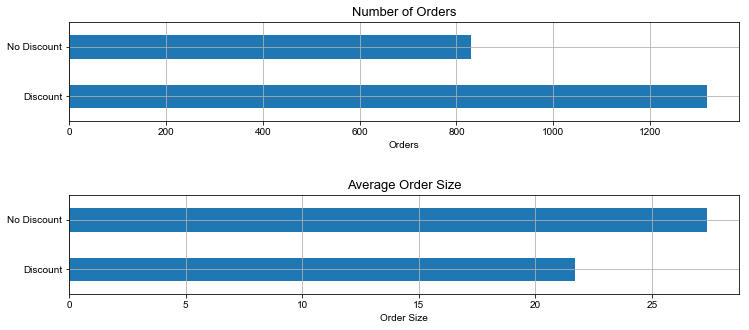

In [49]:
# Comparing the Number of Orders and Average Order Size to DisBool
fig, axes = plt.subplots(2, 1, figsize = (12, 5))
sns.set_style('whitegrid')

#Grouping DataFrame for visualization
df_discount_find.groupby(['DisBool'])['Quantity'].count().plot(kind = 'barh', ax = axes[0])
df_discount_find.groupby(['DisBool'])['Quantity'].mean().plot(kind = 'barh', ax = axes[1])
# First plot labels
axes[0].set_title('Number of Orders', fontsize = 13)
axes[0].set_xlabel('Orders')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['Discount', 'No Discount'])
#Second plot labels
axes[1].set_title('Average Order Size', fontsize = 13)
axes[1].set_xlabel('Order Size')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['Discount', 'No Discount'])
fig.subplots_adjust(hspace = .75)
plt.show()

As we can see above, the number of orders for discounted items is low but the average order size is large compared to non-discounted items. In order to determine the size of the effect, we will test whether this difference is statistically significant.

In [50]:
#Separating discounted items from non-discounted items
query1 = 'DisBool > 0'
df_discount_bool = df_discount_find.query(query1)
query2 ='DisBool == 0'
df_nodiscount_bool = df_discount_find.query(query2)

In [51]:
df_discount_bool.describe()

,ProductId,UnitPrice,Quantity,Discount,DisBool
count,830.000000,830.000000,830.000000,830.000000,830.0
mean,39.868675,26.255482,27.354217,0.145542,1.0
std,22.019037,30.091176,20.720667,0.071250,0.0
min,1.000000,2.000000,1.000000,0.050000,1.0
25%,21.000000,12.125000,12.250000,0.100000,1.0
50%,40.000000,18.000000,20.000000,0.150000,1.0
75%,59.000000,31.230000,36.000000,0.200000,1.0
max,77.000000,263.500000,130.000000,0.250000,1.0


In [52]:
df_nodiscount_bool.describe()

,ProductId,UnitPrice,Quantity,Discount,DisBool
count,1317.000000,1317.000000,1317.000000,1317.0,1317.0
mean,41.396355,26.171534,21.715262,0.0,0.0
std,22.217410,29.717354,17.507493,0.0,0.0
min,1.000000,2.000000,1.000000,0.0,0.0
25%,23.000000,12.000000,10.000000,0.0,0.0
50%,41.000000,18.400000,18.000000,0.0,0.0
75%,60.000000,32.800000,30.000000,0.0,0.0
max,77.000000,263.500000,130.000000,0.0,0.0


In [53]:
#Generate values to create a normal distribution
discount_mu, discount_sigma, n_discount = 27.35, 20.72, 830
nodiscount_mu, nodiscount_sigma, n_nodiscount = 21.72, 17.51, 1317
gen_discount = np.random.normal(discount_mu, discount_sigma, n_discount)
gen_nodiscount = np.random.normal(nodiscount_mu, nodiscount_sigma, n_nodiscount)

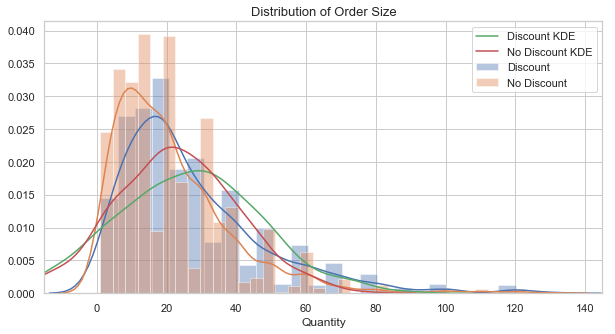

In [54]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style('whitegrid')

ax = sns.distplot(df_discount_bool.Quantity, label = 'Discount')
ax = sns.distplot(df_nodiscount_bool.Quantity, label = 'No Discount')
ax = sns.kdeplot(gen_discount, label = 'Discount KDE')
ax = sns.kdeplot(gen_nodiscount, label = 'No Discount KDE')
ax.set_xlim(-15, 145)
ax.set_title('Distribution of Order Size', fontsize = 13)
ax.legend()

The KDE plot shows us the while there is some postive skew present in the Order distribution size. However because of the sample size we can assume that the distribution is normal.
Because our variables are independent, distributed normally and don't show homogeneity in variance, we will use the Welch's t-test to test test our hypothesis.

In [ ]:
a = df_discount_bool.Quantity.mean()
b = df_nodiscount_bool.Quantity.mean()
print(a, b)

In [55]:
#welch's t-test and Cohen's d
t_stat, p = stats.ttest_ind(df_discount_bool.Quantity, df_nodiscount_bool.Quantity) 
d = cohen_d(df_discount_bool.Quantity, df_nodiscount_bool.Quantity)
print(t_stat, p)
print("Reject Null Hypothesis") if p < 0.025 else print("Failed to reject the null hypothesis")
print("Cohen's d: ", d)

6.7627297036707565 1.7401995278127614e-11
Reject Null Hypothesis
Cohen's d:  0.2997078720940889


In [56]:
discounts_significance_df = pd.DataFrame(columns = ['Discount %', 'Null Hypothesis', "Cohen's d"], index = None)
discounts = [0.05, 0.10, 0.15, 0.20, 0.25]
for i in discounts:
    t_stat, p = stats.ttest_ind(df_discount_bool.Quantity, df_nodiscount_bool.Quantity) 
    d = cohen_d(df_discount_bool.Quantity, df_nodiscount_bool.Quantity)
    discounts_significance_df = discounts_significance_df.append({'Discount %': str(i*100), 'Null Hypothesis': 'Reject' 
                            if p < 0.025 else 'Failed', "Cohen's d": d }, ignore_index = True)

In [57]:
discounts_significance_df

,Discount %,Null Hypothesis,Cohen's d
0,5.0,Reject,0.299708
1,10.0,Reject,0.299708
2,15.0,Reject,0.299708
3,20.0,Reject,0.299708
4,25.0,Reject,0.299708


As we can see above, we have a p-value of 1.70 * 10^11 which is much smaller than 0.05 which means there is a statistical significance between number of orders between discounted and non discounted items. Therefore we can reject the null hypothesis.
Because there is a significance between discounted and non discounted items, we can investigate which discount level has the highest significance.

### 1b) At what discount level(s) is there a statistical significance?

$H_0$ : The average number of orders is the same regardless of discount level <br>
$H_a$ : The average number of orders is not the same the level of discount changes <br>
$alpha$ : 0.05

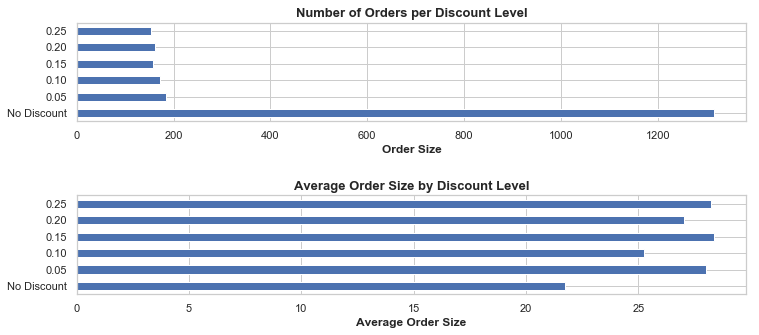

In [58]:
#Viewing difference between discount levels against number of orders and average order size visually
#fig, axes = plt.subplot(1, 2, figsize = (12,5))
fig, axes = plt.subplots(2, 1, figsize=(12,5))
sns.set_style('whitegrid')
#Grouping dataframe
df_discount_find.groupby(['Discount'])['Quantity'].count().plot(kind = 'barh', ax = axes[0])
df_discount_find.groupby(['Discount'])['Quantity'].mean().plot(kind = 'barh', ax = axes[1])
#Plot 1 labels
axes[0].set_title('Number of Orders per Discount Level', fontweight = 'bold', fontsize = 13)
axes[0].set_xlabel('Order Size', fontweight = 'semibold')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['No Discount', '0.05', '0.10', '0.15', '0.20', '0.25'])

#Plot 2 labels
axes[1].set_title('Average Order Size by Discount Level', fontweight = 'bold', fontsize = 13)
axes[1].set_xlabel('Average Order Size', fontweight = 'semibold')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['No Discount', '0.05', '0.10', '0.15', '0.20', '0.25'])
fig.subplots_adjust(hspace = .75);

In constrast to 1a., when order quantity is visualization by discount level we observe a larger difference in the number of orders and smaller difference in average order size at each individual discount level.

In [59]:
#fitting using statsmodels ols
lm = ols('Quantity ~ C(Discount)', df_discount_bool).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6741
Date:                Mon, 19 Aug 2019   Prob (F-statistic):              0.610
Time:                        09:06:36   Log-Likelihood:                -3691.7
No. Observations:                 830   AIC:                             7393.
Df Residuals:                     825   BIC:                             7417.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              28.0108      1.525     18.372      0.000      25.018      31.003
C(Discount)[T.0.1]     -2.7738      2.193     -1.265      0.206      -7.079       1.531
C(Discount)[T.0.15]     0.3714      2.250      0.165      0.869      -4.045       4.788
C(Discount)[T.0.2]     -0.9860      2.235     -0.441      0.659      -5.373       3.401
C(Discount)[T.0.25]     0.2294      2.262      0.101      0.919      -4.211       4.669
==============================================================================
Omnibus:                      263.705   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              751.622
Skew:                           1.598   Prob(JB):                    6.13e-164
Kurtosis:                       6.394   Cond. No.                         5.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#ANOVA analysis
sm.stats.anova_lm(lm, typ = 2)

,sum_sq,df,F,PR(>F)
C(Discount),1159.517551,4.0,0.674103,0.610041
Residual,354768.342690,825.0,NaN,NaN


In [61]:
#Prepping for tukey test:
df_discount_tukey = df_discount_find[df_discount_find.Discount.isin(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'])]
df_discount_tukey.head()

,ProductId,UnitPrice,Quantity,Discount,DisBool
0,11,14.0,12,0.0,0
1,42,9.8,10,0.0,0
2,72,34.8,5,0.0,0
3,14,18.6,9,0.0,0
4,51,42.4,40,0.0,0


In [62]:
#Tukey test
tk = pairwise_tukeyhsd(df_discount_tukey.Quantity, df_discount_tukey.Discount, .05)
print(tk)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0.0    0.05   6.2955   2.0814 10.5097  True 
 0.0    0.1    3.5217  -0.8187  7.8622 False 
 0.0    0.15   6.6669   2.1352 11.1986  True 
 0.0    0.2    5.3096   0.8285  9.7907  True 
 0.0    0.25   6.525    1.954   11.096  True 
 0.05   0.1   -2.7738  -8.4504  2.9028 False 
 0.05   0.15   0.3714  -5.4528  6.1955 False 
 0.05   0.2    -0.986  -6.7708  4.7989 False 
 0.05   0.25   0.2294  -5.6253  6.0842 False 
 0.1    0.15   3.1452   -2.771  9.0613 False 
 0.1    0.2    1.7879  -4.0896  7.6653 False 
 0.1    0.25   3.0033   -2.943  8.9496 False 
 0.15   0.2   -1.3573  -7.3775  4.6628 False 
 0.15   0.25  -0.1419  -6.2292  5.9454 False 
 0.2    0.25   1.2154  -4.8343  7.2652 False 
---------------------------------------------


Reviewing the Tukey test, we fail to reject the null hypothesis for the non-discounted items (control) and 0.10 discounted items (experimental) items. However, we reject the null hypothesis for non-discounted items and discounted items at 0.05, 0.15, 0.20 and 0.25. 
There is no statistically significant difference between the number of products ordered between the non-zero discounted level.

So, in summary there is a statistically significant difference in order quantity based on the presence of a discount at any level, but there is no statistically significant difference between order quantity and at discount level 0.10. We can advise Northwind that customers will order more products when there is a discount, this is not a complete picture. We need to know whether discounts will have a positive effect on revenues. 
Essentially, we need to know whether customers spend more on products that are discounted and this level of spending will offset potential revenue losses from applying discounts. 

## Do discounts have a statistically significant effect on customer spending per order? Is so, at what discount level(s)?

$H_0$: There is no statistical difference on customer spending per order <br>
$H_a$: There is a statistical difference on customer spending per order <br>
$alpha$ = 0.05 <br>

In [63]:
df_discount_spending = pd.read_sql_query("""SELECT od.OrderId, od.UnitPrice, od.Discount, od.Quantity, \
                    od.Quantity * od.UnitPrice * (1-od.Discount) OrderPrice \
                    FROM [OrderDetail] od \
                    INNER JOIN Product p on od.ProductId = p.ID
                    GROUP BY od.OrderId;""", engine)
print(len(df_discount_spending))
df_discount_spending.head(3)

2019-08-19 09:06:49,713 INFO sqlalchemy.engine.base.Engine SELECT od.OrderId, od.UnitPrice, od.Discount, od.Quantity,                     od.Quantity * od.UnitPrice * (1-od.Discount) OrderPrice                     FROM [OrderDetail] od                     INNER JOIN Product p on od.ProductId = p.ID
                    GROUP BY od.OrderId;
2019-08-19 09:06:49,714 INFO sqlalchemy.engine.base.Engine ()
830


,OrderId,UnitPrice,Discount,Quantity,OrderPrice
0,10248,14.0,0.0,12,168.0
1,10249,18.6,0.0,9,167.4
2,10250,7.7,0.0,10,77.0


In [64]:
df_discount_spending['DisBool'] = df_discount_spending['Discount'].apply(lambda x: 0 if x == 0 else 1)
df_discount_spending.head()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool
0,10248,14.0,0.00,12,168.00,0
1,10249,18.6,0.00,9,167.40,0
2,10250,7.7,0.00,10,77.00,0
3,10251,16.8,0.05,6,95.76,1
4,10252,64.8,0.05,40,2462.40,1


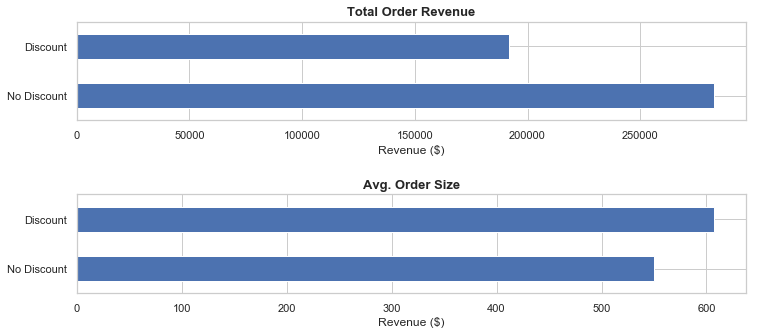

In [65]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2,1, figsize =(12, 5))

#Separating dataframe for visualizations:
df_discount_spending.groupby(['DisBool'])['OrderPrice'].sum().plot(kind = 'barh', ax = axes[0])
df_discount_spending.groupby(['DisBool'])['OrderPrice'].mean().plot(kind = 'barh', ax= axes[1])

#For plot 1
axes[0].set_title("Total Order Revenue", fontweight =  'bold', fontsize = 13)
axes[0].set_xlabel('Revenue ($)')
axes[0].set_ylabel('')
axes[0].set_yticklabels(['No Discount', 'Discount'])

#For plot 2
axes[1].set_title("Avg. Order Size", fontweight = 'bold', fontsize = 13)
axes[1].set_xlabel('Revenue ($)')
axes[1].set_ylabel('')
axes[1].set_yticklabels(['No Discount', 'Discount'])

fig.subplots_adjust(hspace = .75)

Based on the graphs below, Northwind generates more revenue on non-discounted items but discounted items have higher average order cost than non-discounted items. To determine whether this is statistically significant, we should investigate the distribution of Order Price for orders with and without discounts.

In [66]:
#separating dataframe between no discounts and discounts
query3 = 'DisBool == 0'
df_discount_spending_nodisc = df_discount_spending.query(query3)
query4 = 'DisBool > 0'
df_discount_spending_disc = df_discount_spending.query(query4)

In [67]:
print(len(df_discount_spending_nodisc))
df_discount_spending_nodisc.head()

514


,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool
0,10248,14.0,0.0,12,168.0,0
1,10249,18.6,0.0,9,167.4,0
2,10250,7.7,0.0,10,77.0,0
5,10253,10.0,0.0,20,200.0,0
7,10255,15.2,0.0,20,304.0,0


In [68]:
print(len(df_discount_spending_disc))
df_discount_spending_disc.head()

316


,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool
3,10251,16.8,0.05,6,95.76,1
4,10252,64.8,0.05,40,2462.40,1
6,10254,3.6,0.15,15,45.90,1
10,10258,15.2,0.20,50,608.00,1
12,10260,7.7,0.25,16,92.40,1


In [69]:
df_discount_spending_nodisc.describe()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool
count,514.000000,514.000000,514.0,514.000000,514.000000,514.0
mean,10660.875486,25.035195,0.0,20.548638,550.434494,0.0
std,242.920791,25.119688,0.0,16.689650,1098.279105,0.0
min,10248.000000,2.000000,0.0,1.000000,4.800000,0.0
25%,10444.250000,10.300000,0.0,10.000000,120.400000,0.0
50%,10670.500000,18.600000,0.0,15.000000,311.000000,0.0
75%,10874.750000,31.000000,0.0,30.000000,600.000000,0.0
max,11073.000000,263.500000,0.0,110.000000,15810.000000,0.0


In [70]:
df_discount_spending_disc.describe()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.0
mean,10665.142405,26.478639,0.144304,26.212025,607.559364,1.0
std,234.844715,34.334195,0.072369,18.768666,1125.691729,0.0
min,10251.000000,2.000000,0.050000,2.000000,14.400000,1.0
25%,10471.250000,12.500000,0.100000,12.000000,160.860000,1.0
50%,10654.500000,18.000000,0.150000,20.000000,337.392000,1.0
75%,10860.000000,30.000000,0.200000,35.250000,613.700000,1.0
max,11077.000000,263.500000,0.250000,120.000000,15019.500000,1.0


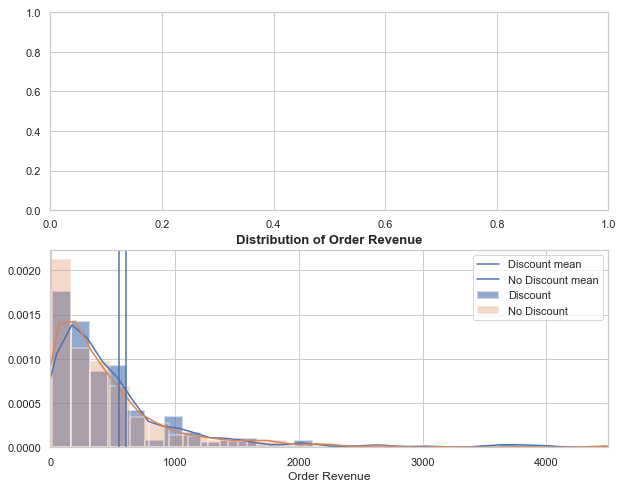

In [71]:
#Visualizing distribution of order price with and without discount
fig, ax = plt.subplots(2,1, figsize=(10, 8))
sns.set_style('whitegrid')

ax = sns.distplot(df_discount_spending_disc.OrderPrice, label = 'Discount', bins = 100, 
                  hist_kws={'linewidth': 2, 'alpha': .6})
ax = sns.distplot(df_discount_spending_nodisc.OrderPrice, label = 'No Discount', bins = 100, 
                 hist_kws={'linewidth': 2, 'alpha': .3})

plt.axvline(np.mean(df_discount_spending_disc.OrderPrice), label = 'Discount mean')
plt.axvline(np.mean(df_discount_spending_nodisc.OrderPrice), label = 'No Discount mean')

ax.set_xlim(-2, 4500)
ax.set_title("Distribution of Order Revenue", fontweight = 'bold', fontsize = 13)
ax.set_xlabel('Order Revenue')
ax.legend()

The distribution of order revenue is positively skewed, so we will need to investigate the order revenues with or without discounts. 

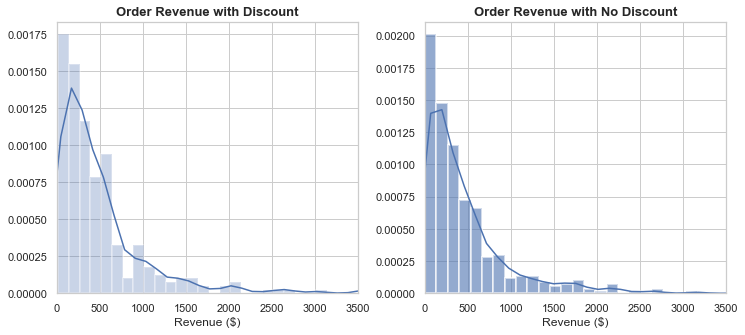

In [72]:
fig, axes = plt.subplots(1, 2, figsize =(12, 5))
sns.set_style('whitegrid')
sns.distplot(df_discount_spending_disc.OrderPrice, label = 'Discount', bins = 120, ax = axes[0],
            hist_kws= {'linewidth': 2, 'alpha': .3})
sns.distplot(df_discount_spending_nodisc.OrderPrice, label = 'No Discount', bins = 120, ax = axes[1],
           hist_kws = {'linewidth': 2, 'alpha': .6})
#Plot 1
axes[0].set_title("Order Revenue with Discount", fontweight = 'bold', fontsize = 13)
axes[0].set_xlabel("Revenue ($)")
axes[0].set_ylabel('')
axes[0].set_xlim(-2, 3500)
#Plot 2
axes[1].set_title("Order Revenue with No Discount", fontweight = 'bold', fontsize = 13)
axes[1].set_xlabel("Revenue ($)")
#axes[1]set_ylabel('')
axes[1].set_xlim(-2, 3500)

fig.subplots_adjust(wspace = .22)
plt.show()

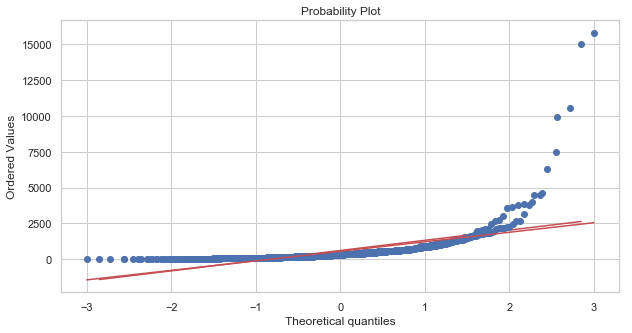

In [73]:
#Q-Q plots:
stats.probplot(df_discount_spending_disc.OrderPrice, plot = plt),
stats.probplot(df_discount_spending_nodisc.OrderPrice, plot = plt), 
ax.set_title("QQ Plot- Distribution of Order Revenue", fontweight = 'semibold', fontsize = 13)
plt.show()

The QQ Plot shows that there is a possiblity that we need to log-transform the data before we could perform a hypothesis test.

In [74]:
df_log_discount = df_discount_spending.copy()
df_log_discount.head()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool
0,10248,14.0,0.00,12,168.00,0
1,10249,18.6,0.00,9,167.40,0
2,10250,7.7,0.00,10,77.00,0
3,10251,16.8,0.05,6,95.76,1
4,10252,64.8,0.05,40,2462.40,1


In [80]:
log_price = np.log(df_discount_spending.OrderPrice)
df_log_discount['LogPrice'] = log_price
df_log_discount.head()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool,Log Price,LogPrice
0,10248,14.0,0.00,12,168.00,0,5.123964,5.123964
1,10249,18.6,0.00,9,167.40,0,5.120386,5.120386
2,10250,7.7,0.00,10,77.00,0,4.343805,4.343805
3,10251,16.8,0.05,6,95.76,1,4.561845,4.561845
4,10252,64.8,0.05,40,2462.40,1,7.808892,7.808892


In [81]:
#take new log dataframe separate between discount and no discount
query_4 = 'Discount == 0'
df_log_price_disc = df_log_discount.query(query_4)
query_5 = 'Discount > 0'
df_log_price_nodisc = df_log_discount.query(query_5)

In [82]:
df_log_price_disc.head()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool,Log Price,LogPrice
0,10248,14.0,0.0,12,168.0,0,5.123964,5.123964
1,10249,18.6,0.0,9,167.4,0,5.120386,5.120386
2,10250,7.7,0.0,10,77.0,0,4.343805,4.343805
5,10253,10.0,0.0,20,200.0,0,5.298317,5.298317
7,10255,15.2,0.0,20,304.0,0,5.717028,5.717028


In [83]:
df_log_price_nodisc.head()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool,Log Price,LogPrice
3,10251,16.8,0.05,6,95.76,1,4.561845,4.561845
4,10252,64.8,0.05,40,2462.40,1,7.808892,7.808892
6,10254,3.6,0.15,15,45.90,1,3.826465,3.826465
10,10258,15.2,0.20,50,608.00,1,6.410175,6.410175
12,10260,7.7,0.25,16,92.40,1,4.526127,4.526127


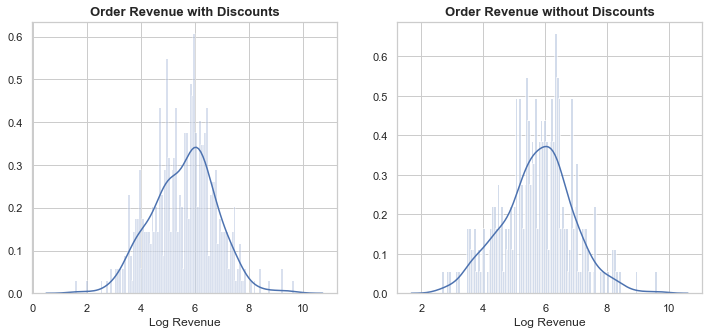

In [86]:
#new visualization for log order price
sns.set_style('whitegrid')
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.distplot(df_log_price_disc.LogPrice, label = 'Discount', bins = 120, ax = axes[0],
            hist_kws={'linewidth': 2, 'alpha': .3})
sns.distplot(df_log_price_nodisc.LogPrice, label = 'No Discount', bins = 120, ax = axes[1],
            hist_kws={'linewidth': 2, 'alpha': .6})
#Plot 1 labels
axes[0].set_title('Order Revenue with Discounts', fontweight = 'bold', fontsize = 13)
axes[0].set_xlabel('Log Revenue')
axes[0].set_ylabel('')
#PLot 2 labels
axes[1].set_title('Order Revenue without Discounts', fontweight = 'bold', fontsize = 13)
axes[1].set_xlabel('Log Revenue')
axes[1].set_ylabel('')

fig.subplots_adjust(wspace = .2)

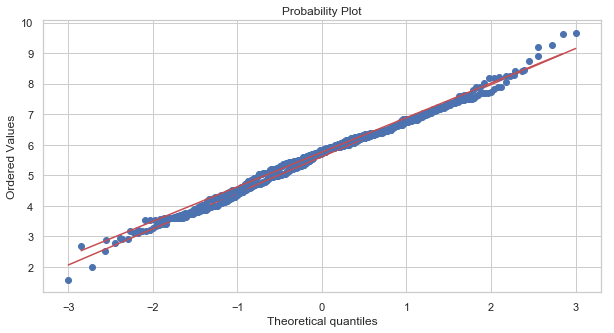

In [87]:
# new QQ plot
stats.probplot(df_log_price_disc.LogPrice, plot = plt),
stats.probplot(df_log_price_nodisc.LogPrice, plot = plt),
ax.set_title("QQ Plot- Distribution of Order Revenue", fontweight = 'semibold', fontsize = 13)
plt.show()

Now, it looks like the Order Price's distribution is a normal distribution and we can move on to hypothesis testing.

In [89]:
stats.ttest_ind(df_log_price_disc.LogPrice, df_log_price_nodisc.LogPrice)

Ttest_indResult(statistic=-1.7953601400952701, pvalue=0.07296089513749296)

Because the p-value > 0.05, we can fail to reject the null hypothesis that states that discounts do not have a statistically signifcant effect on how Northwind's customers spend. 

### What level of discount is there statistically significant effect on customer spending?

$H_0$: There is no difference in the way customers spend as the discount level changes <br>
$H_a$: There is a change in the way customers spend as the discount level changes <br>
$alpha$ = 0.05

In [90]:
df_log_price_disc.head()

,OrderId,UnitPrice,Discount,Quantity,OrderPrice,DisBool,Log Price,LogPrice
0,10248,14.0,0.0,12,168.0,0,5.123964,5.123964
1,10249,18.6,0.0,9,167.4,0,5.120386,5.120386
2,10250,7.7,0.0,10,77.0,0,4.343805,4.343805
5,10253,10.0,0.0,20,200.0,0,5.298317,5.298317
7,10255,15.2,0.0,20,304.0,0,5.717028,5.717028


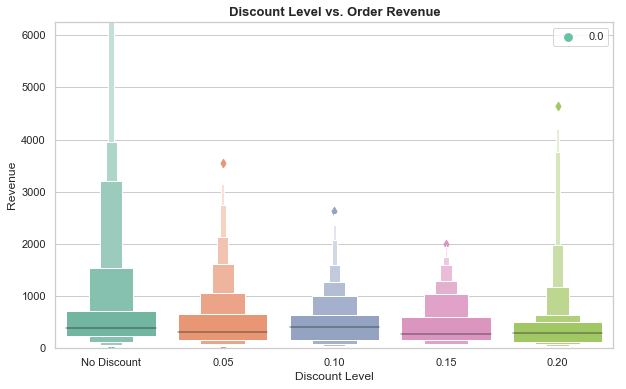

In [98]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxenplot(data = df_discount_spending_disc, x = df_discount_spending_disc.Discount, y = df_discount_spending_disc.OrderPrice, 
                 palette = 'Set2')
ax = sns.swarmplot(data = df_discount_spending_disc, x = df_discount_spending_disc.Discount, y = df_discount_spending_disc.OrderPrice, 
                   hue = df_log_price_disc.Discount, palette = 'Set2', alpha = 0.75)
ax.set_title('Discount Level vs. Order Revenue', fontweight = 'bold', fontsize = 13)
ax.set_ylabel('Order Price')
ax.set_ylim(0, 6250)
ax.set_xlabel('Discount Level')
ax.set_xticklabels(['No Discount', '0.05', '0.10','0.15', '0.20', '0.25'])
ax.legend(loc = 1)

In [116]:
df_log_dis_nodisc = df_log_discount[df_log_discount.Discount.isin([0])]
df_log_dis_5p = df_log_discount[df_log_discount.Discount.isin([0.05])]
df_log_dis_10p = df_log_discount[df_log_discount.Discount.isin([0.10])]
df_log_dis_15p = df_log_discount[df_log_discount.Discount.isin([0.15])]
df_log_dis_20p = df_log_discount[df_log_discount.Discount.isin([0.20])]
df_log_dis_25p = df_log_discount[df_log_discount.Discount.isin([0.25])]

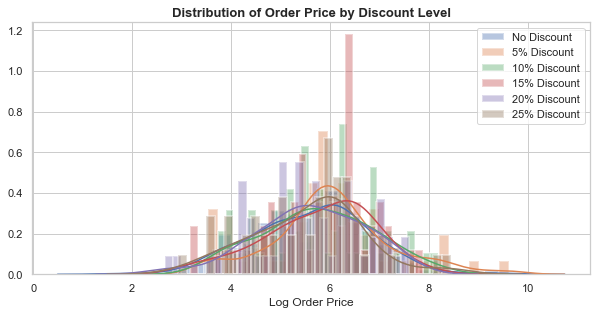

In [117]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.distplot(df_log_dis_nodisc.LogPrice, label = 'No Discount', bins = 30, hist_kws ={'linewidth': 2, 'alpha': .4})
ax = sns.distplot(df_log_dis_5p.LogPrice, label = '5% Discount', bins = 30, hist_kws={'linewidth': 2, 'alpha': .4})
ax = sns.distplot(df_log_dis_10p.LogPrice, label = '10% Discount', bins = 30, hist_kws={'linewidth': 2, 'alpha': .4})
ax = sns.distplot(df_log_dis_15p.LogPrice, label = '15% Discount', bins = 30, hist_kws={'linewidth': 2, 'alpha':.4})
ax = sns.distplot(df_log_dis_20p.LogPrice, label = '20% Discount', bins = 30, hist_kws={'linewidth': 2, 'alpha':.4})
ax = sns.distplot(df_log_dis_25p.LogPrice, label = '25% Discount', bins = 30, hist_kws={'linewidth': 2, 'alpha':.4})

ax.set_title('Distribution of Order Price by Discount Level', fontweight = 'bold', fontsize = 13)
ax.set_xlabel('Log Order Price')
fig.subplots_adjust(top = .85, bottom = .15)
ax.legend()

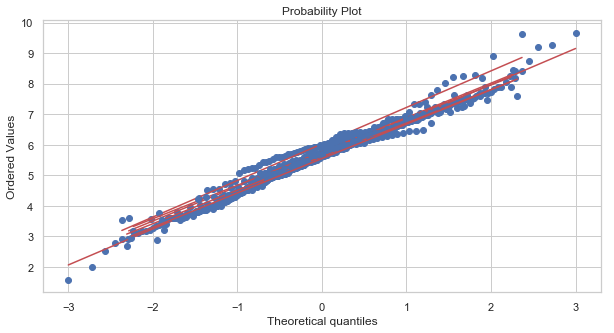

In [120]:
stats.probplot(df_log_dis_nodisc.LogPrice, plot = plt),
stats.probplot(df_log_dis_5p.LogPrice, plot = plt),
stats.probplot(df_log_dis_10p.LogPrice, plot = plt),
stats.probplot(df_log_dis_15p.LogPrice, plot = plt),
stats.probplot(df_log_dis_20p.LogPrice, plot = plt),
stats.probplot(df_log_dis_25p.LogPrice, plot = plt),
plt.show()

As we can see above, the distribution of the order price is a normal distribution and now can move forward with the ANOVA and Tukey tests.

In [121]:
#fit the model
lm = ols('LogPrice ~ C(Discount)', df_log_discount).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LogPrice   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.058
Date:                Mon, 19 Aug 2019   Prob (F-statistic):             0.0686
Time:                        10:41:01   Log-Likelihood:                -1297.8
No. Observations:                 830   AIC:                             2608.
Df Residuals:                     824   BIC:                             2636.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6065      0.051    109.593      0.000       5.506       5.707
C(Discount)[T.0.05]     0.4185      0.142      2.953      0.003       0.140       0.697
C(Discount)[T.0.1]      0.1519      0.156      0.974      0.330      -0.154       0.458
C(Discount)[T.0.15]     0.1604      0.166      0.967      0.334      -0.165       0.486
C(Discount)[T.0.2]      0.0038      0.152      0.025      0.980      -0.294       0.301
C(Discount)[T.0.25]    -0.0602      0.162     -0.372      0.710      -0.378       0.258
==============================================================================
Omnibus:                        1.865   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.394   Jarque-Bera (JB):                1.722
Skew:                          -0.076   Prob(JB):                        0.423
Kurtosis:                       3.163   Cond. No.                         4.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
sm.stats.anova_lm(lm, typ = 2)

,sum_sq,df,F,PR(>F)
C(Discount),13.839226,5.0,2.057624,0.068635
Residual,1108.416417,824.0,NaN,NaN


In [125]:
tk2 = pairwise_tukeyhsd(df_log_discount.LogPrice, df_log_discount.Discount, .05)
print(tk2)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    0.05   0.4185   0.0137 0.8234  True 
 0.0    0.1    0.1519  -0.2935 0.5973 False 
 0.0    0.15   0.1604  -0.3135 0.6343 False 
 0.0    0.2    0.0038  -0.4294 0.437  False 
 0.0    0.25  -0.0602  -0.5227 0.4023 False 
 0.05   0.1   -0.2666  -0.8319 0.2987 False 
 0.05   0.15  -0.2581  -0.8461 0.3299 False 
 0.05   0.2   -0.4147  -0.9704 0.141  False 
 0.05   0.25  -0.4788  -1.0576 0.1001 False 
 0.1    0.15   0.0085  -0.6081 0.6252 False 
 0.1    0.2   -0.1481   -0.734 0.4379 False 
 0.1    0.25  -0.2121   -0.82  0.3958 False 
 0.15   0.2   -0.1566  -0.7645 0.4513 False 
 0.15   0.25  -0.2206  -0.8498 0.4085 False 
 0.2    0.25   -0.064  -0.6631 0.535  False 
--------------------------------------------


The Tukey test shows us that there is a statistically significance between 0.00 and 0.05 discount levels.

## Is there a statistically significance in customer spending by category? If so, at what discount level(s)?

$H_0$: There is no difference in number of orders customers make based on category <br>
$H_a$: There is a statistical difference in the number of orders customers make based on category <br>
$alpha$ = 0.05

In [134]:
df_category_spend = pd.read_sql_query("""SELECT p.Id, c.CategoryName, p.ProductName, od.Discount, 
od.Quantity \
             FROM [Product] p \
             INNER JOIN [OrderDetail] od on od.ProductId = p.Id 
             INNER JOIN [Category] c on p.CategoryId = c.Id""", engine)
df_category_spend.head()

2019-08-19 11:21:08,434 INFO sqlalchemy.engine.base.Engine SELECT p.Id, c.CategoryName, p.ProductName, od.Discount, 
od.Quantity              FROM [Product] p              INNER JOIN [OrderDetail] od on od.ProductId = p.Id 
             INNER JOIN [Category] c on p.CategoryId = c.Id


INFO:sqlalchemy.engine.base.Engine:SELECT p.Id, c.CategoryName, p.ProductName, od.Discount, 
od.Quantity              FROM [Product] p              INNER JOIN [OrderDetail] od on od.ProductId = p.Id 
             INNER JOIN [Category] c on p.CategoryId = c.Id


2019-08-19 11:21:08,438 INFO sqlalchemy.engine.base.Engine ()


INFO:sqlalchemy.engine.base.Engine:()


,Id,CategoryName,ProductName,Discount,Quantity
0,11,Dairy Products,Queso Cabrales,0.0,12
1,42,Grains/Cereals,Singaporean Hokkien Fried Mee,0.0,10
2,72,Dairy Products,Mozzarella di Giovanni,0.0,5
3,14,Produce,Tofu,0.0,9
4,51,Produce,Manjimup Dried Apples,0.0,40


In [135]:
df_category_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
Id              2155 non-null int64
CategoryName    2155 non-null object
ProductName     2155 non-null object
Discount        2155 non-null float64
Quantity        2155 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 84.3+ KB


In [136]:
#how many categories of each
df_category_spend.CategoryName.value_counts()

Beverages         404
Dairy Products    366
Confections       334
Seafood           330
Condiments        216
Grains/Cereals    196
Meat/Poultry      173
Produce           136
Name: CategoryName, dtype: int64

In [137]:
#investigating discount levels in dataframe
df_category_spend.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Because the number of discounts for 0.01, 0.02, 0.03, 0.04 and 0.06 are so low and usually discounts come in magnitude of 0.05, they will be dropped from this analysis.

In [138]:
#removing small discounts
df_category_disc = df_category_spend[df_category_spend.Discount.isin(['0.00', '0.05', '0.10', '0.15', '0.20', '0.25'])]
df_category_disc.head()

,Id,CategoryName,ProductName,Discount,Quantity
0,11,Dairy Products,Queso Cabrales,0.0,12
1,42,Grains/Cereals,Singaporean Hokkien Fried Mee,0.0,10
2,72,Dairy Products,Mozzarella di Giovanni,0.0,5
3,14,Produce,Tofu,0.0,9
4,51,Produce,Manjimup Dried Apples,0.0,40


In [139]:
#Separate dataframe between discount and no discount
query5 = 'Discount == 0'
df_category_disc_none = df_category_disc.query(query5)
query6 = 'Discount > 0'
df_category_disc_spend = df_category_disc.query(query6)

In [142]:
print(len(df_category_disc_none))
print(len(df_category_disc_spend))

1317
830


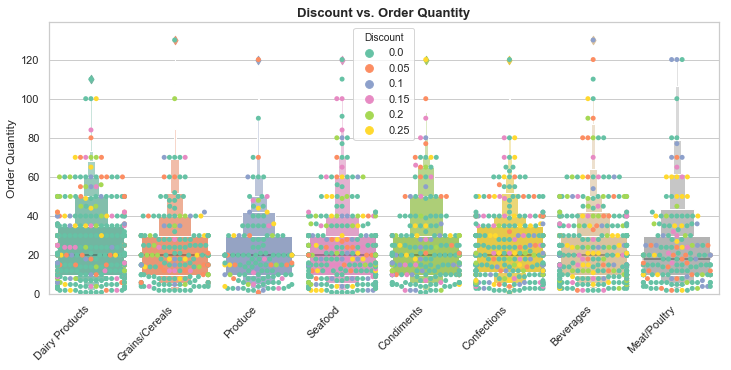

In [144]:
#Visualizing the distribution
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.boxenplot(data = df_category_disc, x = df_category_disc.CategoryName, y = df_category_disc.Quantity, palette = 'Set2')
ax = sns.swarmplot(data = df_category_disc, x = df_category_disc.CategoryName, y = df_category_disc.Quantity, 
                   hue = df_category_disc.Discount, palette = 'Set2')
ax.set_title('Discount vs. Order Quantity', fontweight = 'bold', fontsize = 13)
ax.set_ylabel('Order Quantity')
ax.set_xlabel('')
ax.set_ylim(0)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

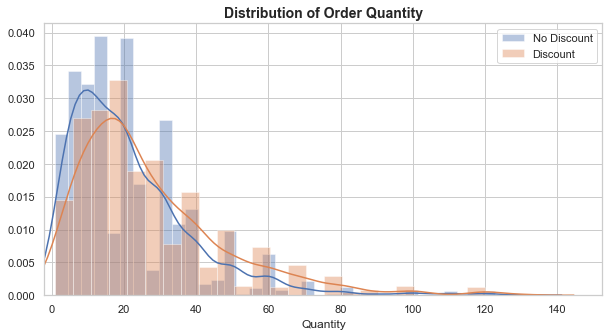

In [146]:
ax = sns.distplot(df_category_disc_none.Quantity, label = 'No Discount')
ax = sns.distplot(df_category_disc_spend.Quantity, label = 'Discount')
ax.set_xlim(-2)
ax.set_title('Distribution of Order Quantity', fontweight = 'bold', fontsize= 14)
ax.legend(loc = 1)

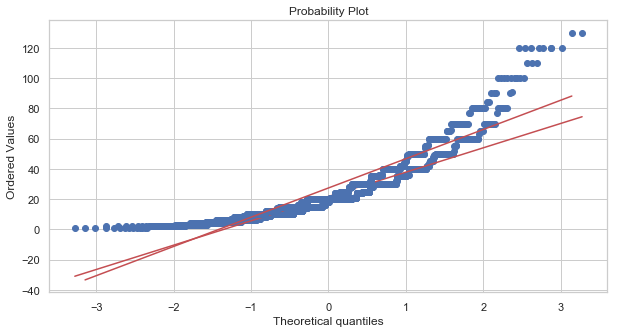

In [149]:
stats.probplot(df_category_disc_none.Quantity, plot = plt),
stats.probplot(df_category_disc_spend.Quantity, plot = plt),
plt.show()

Based on this and the graph above, it looks like the distribution of the order quantity is not a normal distribution. So, we will log transform the column before moving forward with hypothesis testing.

In [159]:
df_log_disc_category_spend = df_category_disc.copy()
df_category_quant = np.log(df_log_disc_category_spend.Quantity)
df_log_disc_category_spend['LogOrderQuantity'] = df_category_quant

df_log_disc_category_spend.head(3)

,Id,CategoryName,ProductName,Discount,Quantity,LogOrderQuantity
0,11,Dairy Products,Queso Cabrales,0.0,12,2.484907
1,42,Grains/Cereals,Singaporean Hokkien Fried Mee,0.0,10,2.302585
2,72,Dairy Products,Mozzarella di Giovanni,0.0,5,1.609438


Text(0, 0.5, '')

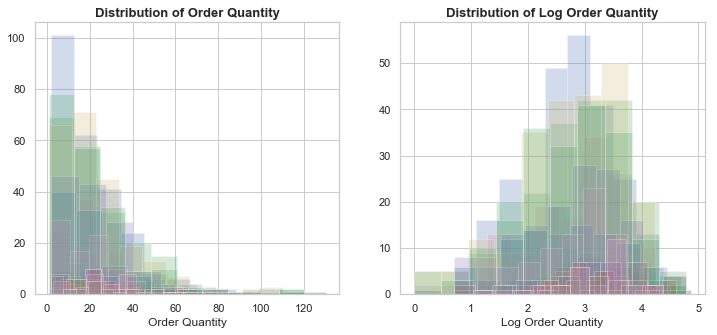

In [161]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
df_category_disc.groupby(['CategoryName', 'Discount'])['Quantity'].hist(ax = axes[0], alpha = 0.25)
df_log_disc_category_spend.groupby(['CategoryName', 'Discount'])['LogOrderQuantity'].hist(ax = axes[1], alpha = 0.25)

axes[0].set_title('Distribution of Order Quantity', fontweight = 'bold', fontsize = 13)
axes[0].set_xlabel('Order Quantity')
axes[0].set_ylabel('')

axes[1].set_title('Distribution of Log Order Quantity', fontweight = 'bold', fontsize = 13)
axes[1].set_xlabel('Log Order Quantity')
axes[1].set_ylabel('')

We can see that our Order Quantity looks more like it would pass the normality assumption in order to continue a hypothesis test. 

In [166]:
#separating the dataframe between no discount and discounts
query = 'Discount == 0'
df_log_disc_cat_none = df_log_disc_category_spend.query(query)

query0 = 'Discount > 0'
df_log_disc_cat_discount = df_log_disc_category_spend.query(query0)

In [170]:
# two tailed Welch's t-test
stats.ttest_ind(df_log_disc_cat_none.LogOrderQuantity, df_log_disc_cat_discount.LogOrderQuantity)

Ttest_indResult(statistic=-6.920700463008245, pvalue=5.91313388186685e-12)

Because our p-value < 0.05, we fail to reject the null hypothesis and can say that there is a statistically significant difference between the number of orders customers make between the different categories.